# Predict the posture of a person using their personality type and pain scale

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
pd.options.display.max_rows = 100

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/dansek-dj/Offbeat-Projects/main/MyersBriggs/Myers%20Briggs%20Table_S1.csv', index_col = '#')
df.head()

,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY LEVEL,PAIN 1,PAIN 2,PAIN 3,PAIN 4,MBTI,E,I,S,N,T,F,J,P,POSTURE
#,,,,,,,,,,,,,,,,,,,
1,53,62,125,Female,Low,0.0,0.0,0.0,0.0,ESFJ,18,3,17,9,9,13,18,4,A
2,52,69,157,Male,High,7.0,8.0,5.0,3.0,ISTJ,6,15,14,12,21,3,13,9,B
3,30,69,200,Male,High,0.0,0.0,0.0,0.0,ESTJ,15,6,16,10,15,9,12,10,A
4,51,66,175,Male,Moderate,9.5,9.5,9.5,1.5,ISTJ,6,15,21,5,13,11,19,3,D
5,45,63,199,Female,Moderate,4.0,5.0,2.0,2.0,ENFJ,14,7,20,6,9,15,16,6,A


In [4]:
(df.isna().sum()/df.shape[0]).sort_values(ascending = False)

AGE               0.0
E                 0.0
P                 0.0
J                 0.0
F                 0.0
T                 0.0
N                 0.0
S                 0.0
I                 0.0
MBTI              0.0
HEIGHT            0.0
PAIN 4            0.0
PAIN 3            0.0
PAIN 2            0.0
PAIN 1            0.0
ACTIVITY LEVEL    0.0
SEX               0.0
WEIGHT            0.0
POSTURE           0.0
dtype: float64

<AxesSubplot:xlabel='AGE', ylabel='Count'>

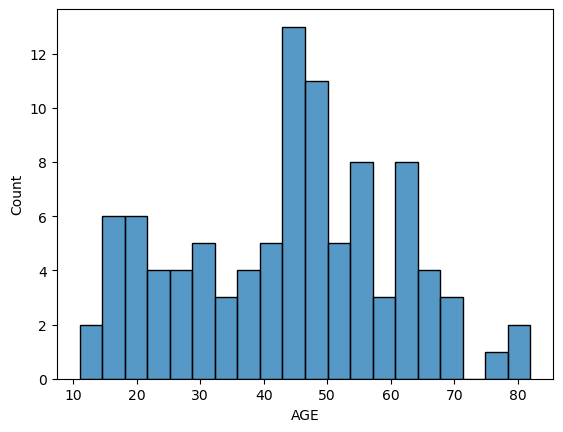

In [5]:
sns.histplot(df.AGE, bins = 20)

<AxesSubplot:xlabel='HEIGHT', ylabel='Count'>

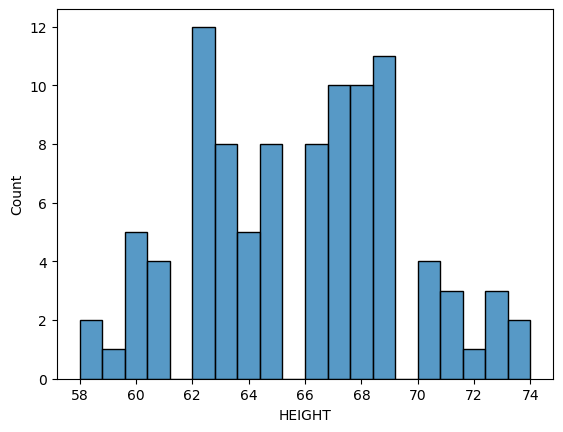

In [6]:
sns.histplot(df.HEIGHT, bins = 20)

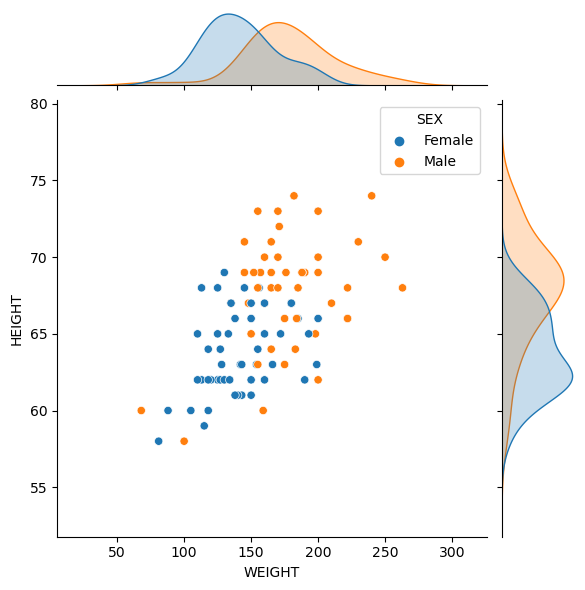

In [7]:
sns.jointplot(data = df, x = 'WEIGHT', y = 'HEIGHT',  hue  = 'SEX')

<AxesSubplot:xlabel='ACTIVITY LEVEL', ylabel='count'>

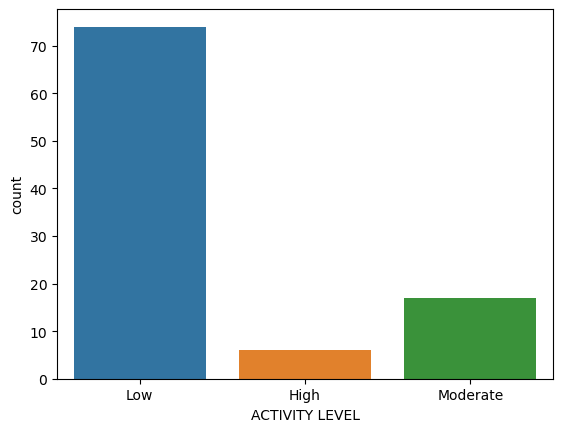

In [8]:
sns.countplot(x = df['ACTIVITY LEVEL'])

In [9]:
for column in df.columns:
    print(column)
    print(df[column].value_counts(normalize = True))

AGE
45    0.061856
43    0.051546
48    0.041237
28    0.030928
56    0.030928
30    0.030928
16    0.030928
20    0.030928
62    0.030928
42    0.030928
66    0.030928
49    0.030928
18    0.020619
53    0.020619
19    0.020619
29    0.020619
39    0.020619
55    0.020619
52    0.020619
47    0.020619
33    0.020619
57    0.020619
50    0.020619
71    0.020619
61    0.020619
63    0.020619
65    0.010309
25    0.010309
21    0.010309
58    0.010309
24    0.010309
41    0.010309
60    0.010309
68    0.010309
75    0.010309
44    0.010309
51    0.010309
11    0.010309
37    0.010309
59    0.010309
36    0.010309
13    0.010309
80    0.010309
82    0.010309
17    0.010309
23    0.010309
54    0.010309
34    0.010309
64    0.010309
46    0.010309
26    0.010309
40    0.010309
22    0.010309
Name: AGE, dtype: float64
HEIGHT
62    0.123711
69    0.113402
68    0.103093
67    0.103093
66    0.082474
63    0.082474
65    0.082474
60    0.051546
64    0.051546
61    0.041237
70    0.041237
71 

## Encoding the categorical data

In [10]:
df.SEX = df.SEX.replace({'Female' : 0, 'Male' : 1})
df['ACTIVITY LEVEL'] = df['ACTIVITY LEVEL'].replace({'Low' : 0, 'Moderate' : 1, 'High': 2})
df['POSTURE'] = df['POSTURE'].replace({'A' : 0, 'B' : 1, 'C': 2, 'D':3})

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.MBTI = le.fit_transform(df.MBTI)

In [12]:
print(df.SEX.unique())
print(df['ACTIVITY LEVEL'].unique())
print(df.POSTURE.unique())
print(df.MBTI.unique())

[0 1]
[0 2 1]
[0 1 3 2]
[ 4 13  6  0 12 14  8  3 11  2  7  1  5  9 10]


In [13]:
df.head()

,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY LEVEL,PAIN 1,PAIN 2,PAIN 3,PAIN 4,MBTI,E,I,S,N,T,F,J,P,POSTURE
#,,,,,,,,,,,,,,,,,,,
1,53,62,125,0,0,0.0,0.0,0.0,0.0,4,18,3,17,9,9,13,18,4,0
2,52,69,157,1,2,7.0,8.0,5.0,3.0,13,6,15,14,12,21,3,13,9,1
3,30,69,200,1,2,0.0,0.0,0.0,0.0,6,15,6,16,10,15,9,12,10,0
4,51,66,175,1,1,9.5,9.5,9.5,1.5,13,6,15,21,5,13,11,19,3,3
5,45,63,199,0,1,4.0,5.0,2.0,2.0,0,14,7,20,6,9,15,16,6,0


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, confusion_matrix

In [15]:
train_X, test_X, train_y, test_y = train_test_split(df.drop(columns = ['POSTURE', 'MBTI']), df.POSTURE, test_size=0.2, 
                                                   random_state=42, stratify=df.POSTURE )

In [16]:
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((77, 17), (20, 17), (77,), (20,))

In [17]:
Dtree = DecisionTreeClassifier()
Dtree

DecisionTreeClassifier()

In [18]:
Dtree.fit(train_X, train_y)

DecisionTreeClassifier()

In [19]:
pred_train_y = Dtree.predict(train_X)

In [20]:
accuracy_score(train_y, pred_train_y)

1.0

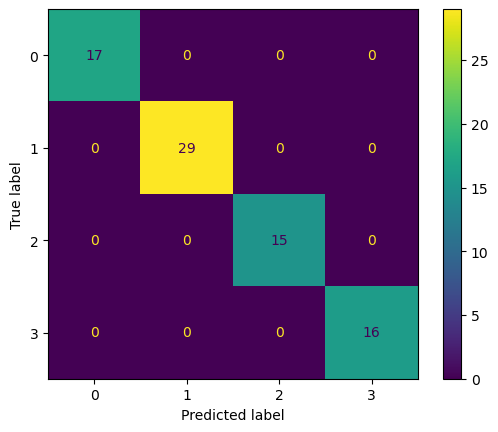

In [21]:
ConfusionMatrixDisplay(confusion_matrix(train_y, pred_train_y)).plot()

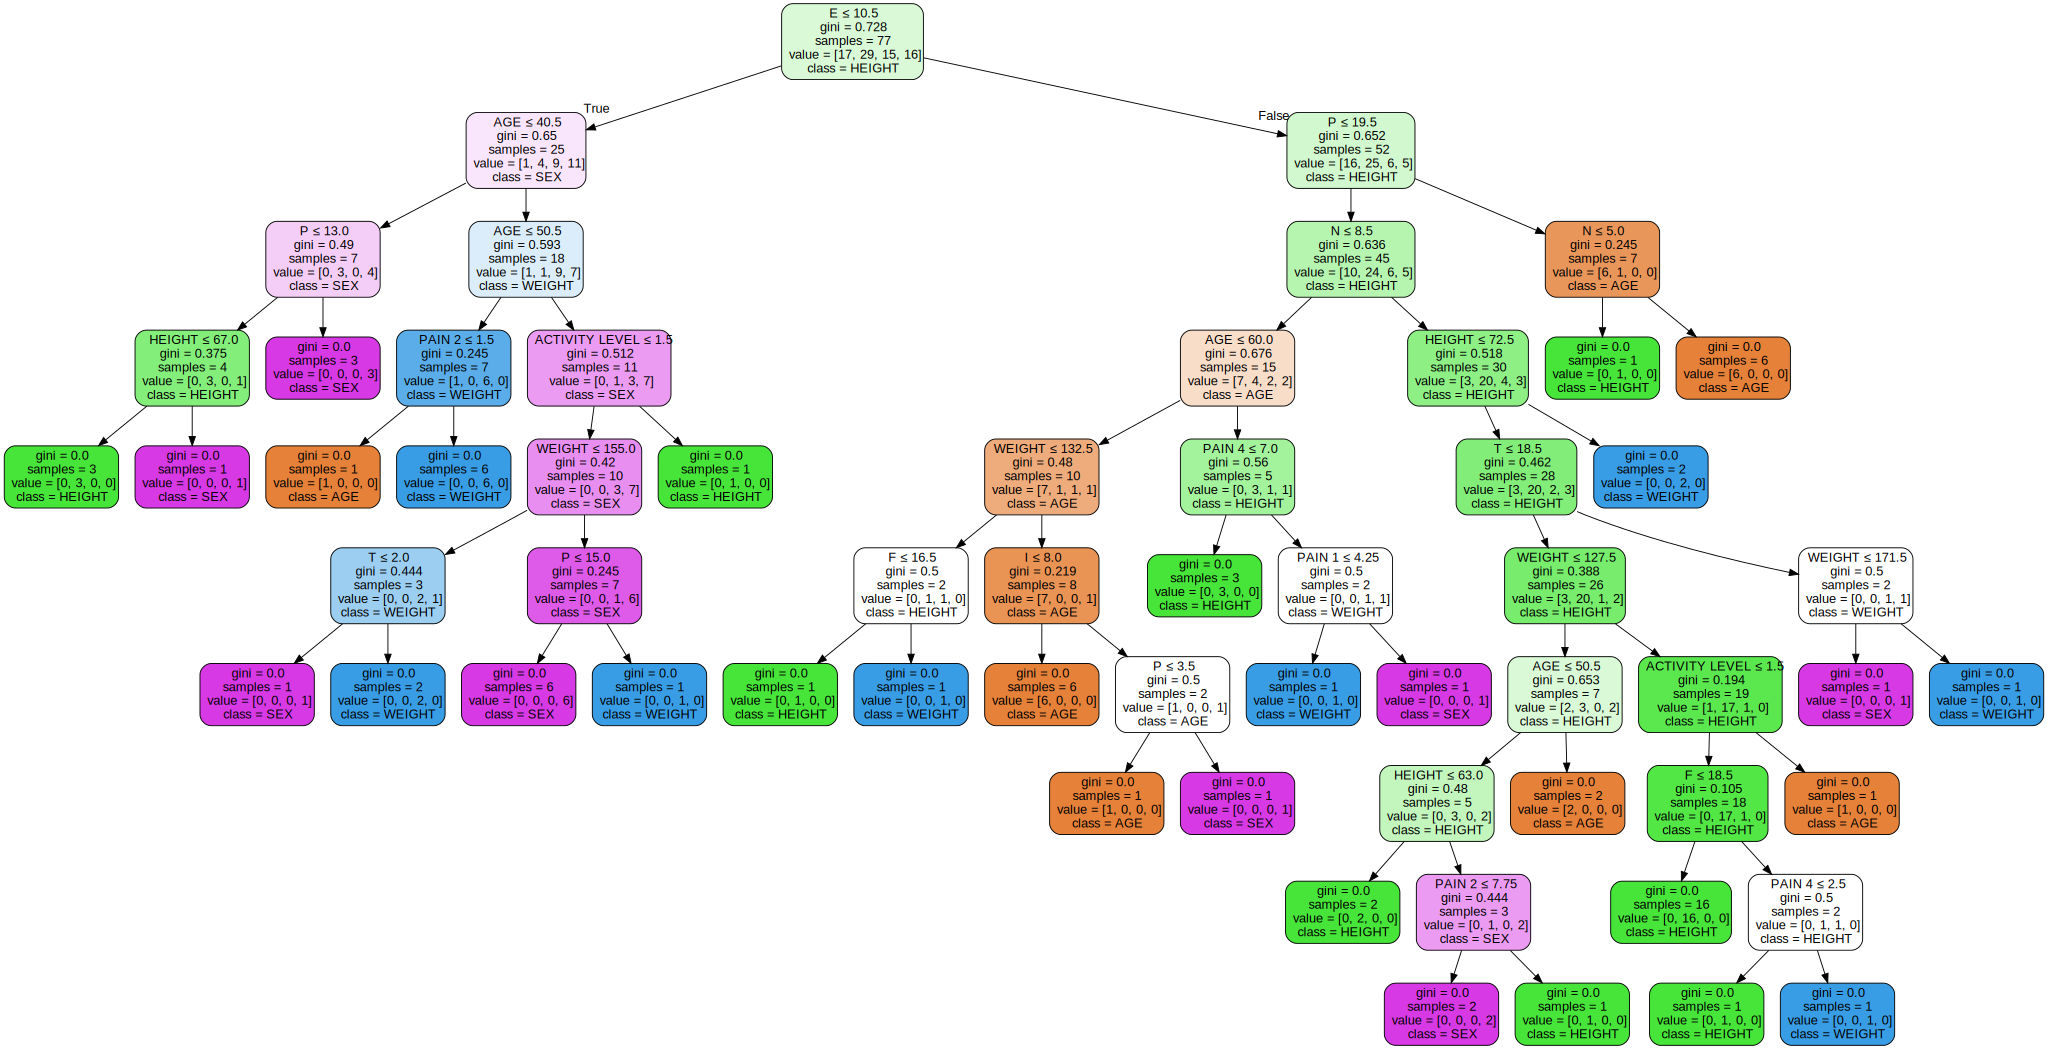

In [22]:
import graphviz
dot_data = tree.export_graphviz(Dtree, out_file=None, 
                      feature_names=train_X.columns,  
                      class_names=test_X.columns,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [23]:
pred_test_y = Dtree.predict(test_X)

In [24]:
pred_test_y

array([0, 1, 0, 3, 1, 2, 1, 2, 3, 0, 3, 1, 2, 0, 2, 0, 2, 2, 3, 1],
      dtype=int64)

In [25]:
accuracy_score(test_y, pred_test_y)

0.35

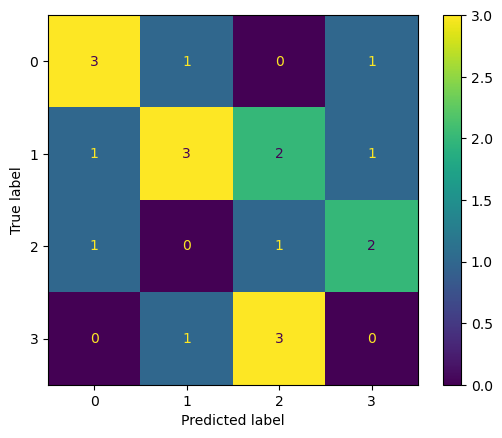

In [26]:
ConfusionMatrixDisplay(confusion_matrix(test_y, pred_test_y)).plot()

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [28]:
Scaler = StandardScaler()

In [29]:
train_scale = pd.DataFrame(Scaler.fit_transform(train_X), columns = train_X.columns)
train_scale.head()

,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY LEVEL,PAIN 1,PAIN 2,PAIN 3,PAIN 4,E,I,S,N,T,F,J,P
0,1.240988,-0.664033,-0.405251,-0.937043,-0.477274,-0.149275,-1.255367,-0.778652,-0.830420,-1.542585,1.554666,0.076064,-0.125015,1.116800,-1.114773,1.353671,-1.358687
1,0.610066,2.327648,2.303363,1.067187,-0.477274,-0.902992,1.000109,-0.778652,0.484589,0.640184,-0.638481,-0.342288,0.302815,1.116800,-1.114773,0.110692,-0.111102
2,-0.078214,-0.936004,0.092249,-0.937043,-0.477274,-0.902992,0.355687,-0.778652,-0.830420,-0.633098,0.640855,1.331119,-1.408507,-1.083462,1.105163,1.353671,-1.358687
3,0.208569,1.511735,-0.322334,1.067187,-0.477274,-0.902992,1.000109,0.778652,-0.830420,-1.724482,1.737429,-0.969815,0.944561,-0.900107,0.920168,-1.132287,1.136483
4,0.437996,0.967793,0.009333,1.067187,3.197736,1.735016,1.322320,1.167978,0.155837,-1.178790,1.189142,-0.342288,0.302815,1.850220,-1.854751,0.465829,-0.467555


In [30]:
error=[]
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(train_scale, train_y)
    knn_pred = knn.predict(train_scale)
    error.append(np.mean(knn_pred != train_y))

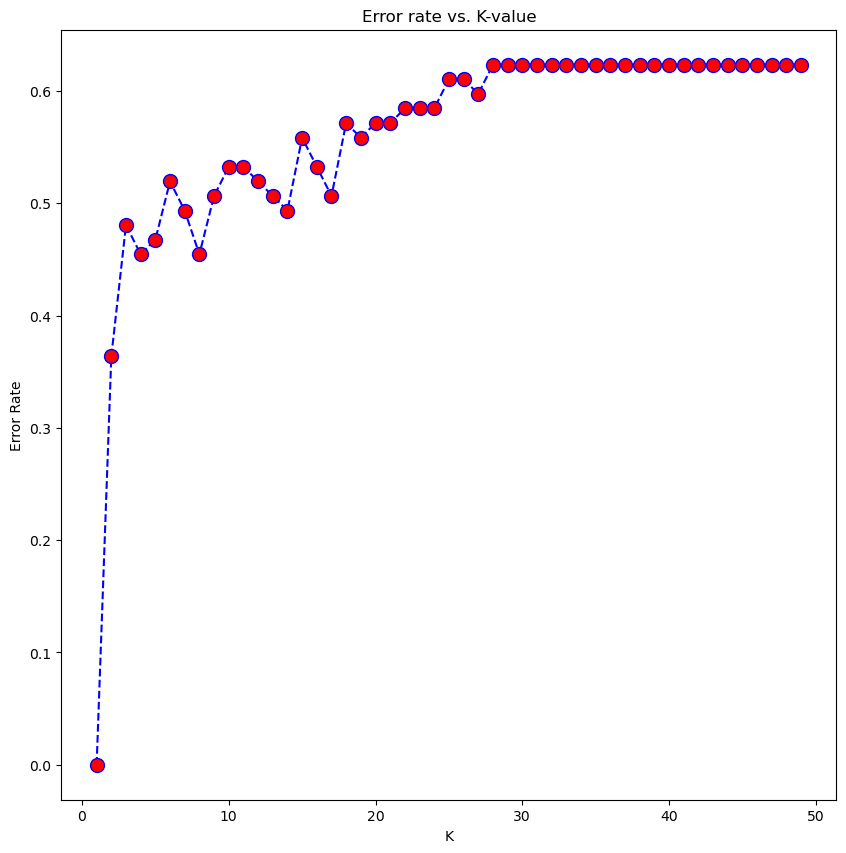

In [31]:
plt.figure(figsize=(10,10))
plt.plot(range(1,50),error , color = 'blue', linestyle = 'dashed',marker = 'o',
        markerfacecolor = 'red',markersize= 10)
plt.title('Error rate vs. K-value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

We find that the error in n_neighbors = 11 is less

In [32]:
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(train_scale, train_y)
knn_pred = knn.predict(test_X)

In [33]:
print(accuracy_score(test_y, knn_pred))

0.55


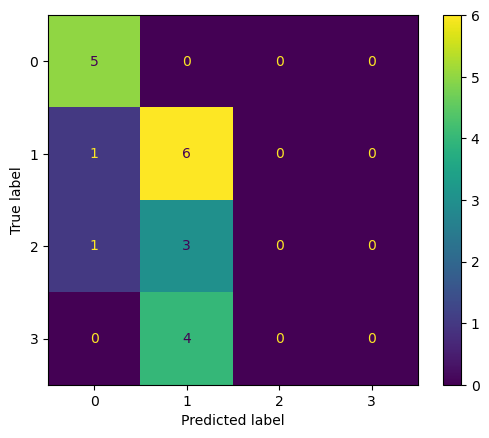

In [34]:
ConfusionMatrixDisplay(confusion_matrix(test_y, knn_pred)).plot()

In [35]:
lr = LogisticRegression(multi_class='multinomial')
lr.fit(train_scale, train_y)

LogisticRegression(multi_class='multinomial')

In [36]:
pred_log = lr.predict(test_X)

In [37]:
accuracy_score(test_y, pred_log)

0.25

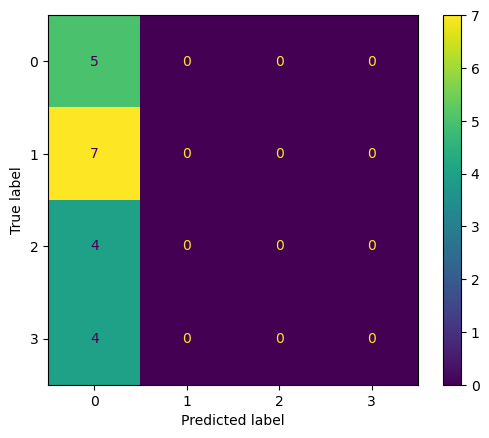

In [38]:
ConfusionMatrixDisplay(confusion_matrix(test_y, pred_log)).plot()

In [55]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('lr', lr),('knn', knn), ('Dt', Dtree)], voting = 'hard')

In [56]:
voting_clf.fit(train_scale, train_y)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(multi_class='multinomial')),
                             ('knn', KNeighborsClassifier(n_neighbors=11)),
                             ('Dt', DecisionTreeClassifier())])

In [57]:
voting_clf2 = VotingClassifier(estimators=[('lr', lr),('knn', knn), ('Dt', Dtree)], voting = 'soft')

In [58]:
voting_clf2.fit(train_scale, train_y)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(multi_class='multinomial')),
                             ('knn', KNeighborsClassifier(n_neighbors=11)),
                             ('Dt', DecisionTreeClassifier())],
                 voting='soft')

In [84]:
for clf in (lr,knn, Dtree,voting_clf,voting_clf2):
    clf.fit(train_scale, train_y)
    y_pred = clf.predict(test_X)
    print(clf.__class__.__name__, accuracy_score(test_y, y_pred))

LogisticRegression 0.25
KNeighborsClassifier 0.55
DecisionTreeClassifier 0.25
VotingClassifier 0.25
VotingClassifier 0.4
